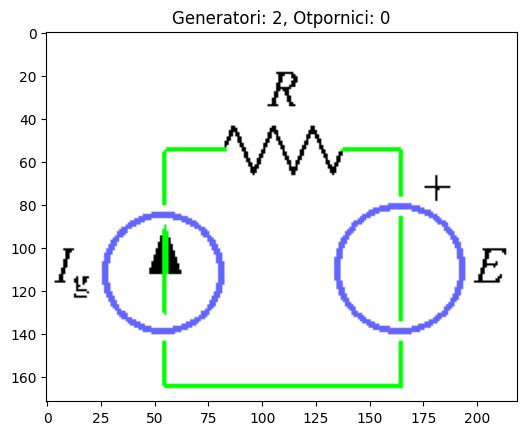

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

putanja_slike = "1.jpg"
slika = cv2.imread(putanja_slike, cv2.IMREAD_GRAYSCALE)
_, binarna_slika = cv2.threshold(slika, 128, 255, cv2.THRESH_BINARY)

zamucena_slika = cv2.GaussianBlur(binarna_slika, (3, 3), 0)

krugovi = cv2.HoughCircles(
    zamucena_slika,
    cv2.HOUGH_GRADIENT,
    dp=1, minDist=20, param1=100, param2=30,
    minRadius=22, maxRadius=50
)

broj_generatora = 0
broj_otpornika = 0
binarna_slika_rgb=cv2.cvtColor(binarna_slika, cv2.COLOR_GRAY2RGB)
#prvi put kada se registruju krugovi(generatori), bri[u se, odnosno boje se u belo, kako bi se ostale stvari u kolu lakse prepoznale
if krugovi is not None:
    krugovi = np.uint16(np.around(krugovi))
    obojena_slika = cv2.cvtColor(binarna_slika, cv2.COLOR_GRAY2BGR)
    
    for krug in krugovi[0, :]:
        x, y, radius = krug
        cv2.circle(binarna_slika_rgb, (x, y), radius, (255, 255, 255), 7)
        cv2.circle(binarna_slika, (x, y), radius, 255, 8)
        broj_generatora += 1

"""if krugovi is not None:
    krugovi = np.uint16(np.around(krugovi))
    obojena_slika = cv2.cvtColor(binarna_slika, cv2.COLOR_GRAY2BGR)
    
    for krug in krugovi[0, :]:
        x, y, radius = krug
        cv2.circle(binarna_slika, (x, y), radius, (0), 2)
        
"""
#deo koji brise crne linije koje su horiyontalne i vertikalne------------------------------------------
for y in range(binarna_slika.shape[0]):
    broj_crnih = 0
    for x in range(binarna_slika.shape[1]):
        if binarna_slika[y, x] == 0:
            broj_crnih += 1
            if broj_crnih >= 20:
                for i in range (0,20):
                    binarna_slika_rgb[y,x-i]=(0,255,0)
                    binarna_slika[y,x-i]=255
                while x < binarna_slika.shape[1] and binarna_slika[y, x] == 0:
                    binarna_slika_rgb[y, x] = (0,255,0)# Pobeli crne piksele
                    binarna_slika_rgb[y, x] = 255
                    x += 1
        else:
            broj_crnih = 0


for x in range(binarna_slika.shape[1]):
    broj_crnih = 0
    for y in range(binarna_slika.shape[0]):
        if binarna_slika[y, x] == 0:  # Crna boja
            broj_crnih += 1
            if broj_crnih >= 20: 
                for i in range (0,20):
                    binarna_slika_rgb[y-i,x]=(0,255,0)# Promenjeno u >=
                    binarna_slika[y-i,x]=255
                while y < binarna_slika.shape[0] and binarna_slika[y, x] == 0:
                    binarna_slika_rgb[y, x] = (0,255,0)  # Pobeli crne piksele
                    binarna_slika[y, x] = 255
                    y += 1
        else:
            broj_crnih = 0

if krugovi is not None:
    krugovi = np.uint16(np.around(krugovi))
    obojena_slika = cv2.cvtColor(binarna_slika, cv2.COLOR_GRAY2BGR)
    
    for krug in krugovi[0, :]:
        x, y, radius = krug
        cv2.circle(binarna_slika_rgb, (x, y), radius, (100,100,255), 2)

#////////////////////////////////////////////////////////////////////////////////////////
import cv2
import numpy as np

# Load an image
image = binarna_slika
gray_image = image

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

# Apply Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=30, minLineLength=0, maxLineGap=5)

# Draw detected lines on the original image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 5)
"""
# Display the result
cv2.imshow('Detected Lines', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
"""



#////////////////////////////////////////////////////////////////////////////////////////



obojena_slika = cv2.cvtColor(binarna_slika, cv2.COLOR_GRAY2BGR) 
plt.imshow(binarna_slika_rgb)
plt.title(f'Generatori: {broj_generatora}, Otpornici: {broj_otpornika}')
plt.show()


In [317]:
import cv2
import numpy as np

# Load the image
image_path = '2.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Harris Corner Detector
corner_response = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)
corner_response = cv2.dilate(corner_response, None)  # Dilate to enhance corners

# Threshold the corner response
threshold = 0.01 * corner_response.max()
corners = np.argwhere(corner_response > threshold)

# Create a window for visualization
image_with_corners = image.copy()

# Draw circles around the detected corners
for corner in corners:
    x, y = corner
    cv2.circle(image_with_corners, (y, x), 5, (0, 0, 255), -1)  # Red circle

# Define the smaller kernel resolution
kernel_resolution = 61

# Check for the number of corners in a kernel of defined resolution
kernel_corners = 0

for corner in corners:
    x, y = corner
    x_start, y_start = x - kernel_resolution // 2, y - kernel_resolution // 2
    x_end, y_end = x_start + kernel_resolution, y_start + kernel_resolution

    if x_start >= 0 and y_start >= 0 and \
       x_end < gray_image.shape[0] and y_end < gray_image.shape[1]:
        kernel = corner_response[x_start:x_end, y_start:y_end]
        if np.count_nonzero(kernel > threshold) >= 6:
            kernel_corners += 1

# If 6 or more corners are found in the kernel, it's recognized as a resistor
if kernel_corners >= 6:
    print("Resistor detected!")
else:
    print("No resistor detected.")

# Display the image with detected corners
cv2.imshow("Corners Detected", image_with_corners)
cv2.waitKey(0)
cv2.destroyAllWindows()


Resistor detected!


In [318]:
import cv2
import numpy as np

# Load the image
image_path = '1.jpg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Harris Corner Detector
corner_response = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)
corner_response = cv2.dilate(corner_response, None)  # Dilate to enhance corners

# Threshold the corner response
threshold = 0.01 * corner_response.max()
corners = np.argwhere(corner_response > threshold)

# Create a window for visualization
image_with_corners = image.copy()

# Define kernel dimensions for horizontal and vertical resistors
kernel_height = 23
kernel_length = 61

# Check for the number of corners in a kernel of defined dimensions
for corner in corners:
    x, y = corner
    x_start_h, y_start_h = x - kernel_height // 2, y - kernel_length // 2
    x_end_h, y_end_h = x_start_h + kernel_height, y_start_h + kernel_length

    x_start_v, y_start_v = x - kernel_length // 2, y - kernel_height // 2
    x_end_v, y_end_v = x_start_v + kernel_length, y_start_v + kernel_height

    if x_start_h >= 0 and y_start_h >= 0 and \
       x_end_h < gray_image.shape[0] and y_end_h < gray_image.shape[1]:
        kernel_h = corner_response[x_start_h:x_end_h, y_start_h:y_end_h]
        if np.count_nonzero(kernel_h > threshold) >= 6:
            cv2.rectangle(image_with_corners, (y_start_h, x_start_h), (y_end_h, x_end_h), (0, 0, 255), 2)

    if x_start_v >= 0 and y_start_v >= 0 and \
       x_end_v < gray_image.shape[0] and y_end_v < gray_image.shape[1]:
        kernel_v = corner_response[x_start_v:x_end_v, y_start_v:y_end_v]
        if np.count_nonzero(kernel_v > threshold) >= 6:
            cv2.rectangle(image_with_corners, (y_start_v, x_start_v), (y_end_v, x_end_v), (0, 0, 255), 2)

# Display the image with detected corners and marked resistors
cv2.imshow("Corners Detected", image_with_corners)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [319]:
import cv2
import numpy as np

# Load the image
image_path = '2.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Harris Corner Detector
corner_response = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)
corner_response = cv2.dilate(corner_response, None)  # Dilate to enhance corners

# Threshold the corner response
threshold = 0.01 * corner_response.max()
corners = np.argwhere(corner_response > threshold)

# Create a window for visualization
image_with_corners = image.copy()

# Define kernel dimensions for horizontal and vertical resistors
kernel_height = 23
kernel_length = 61

# Check for the number of corners in a kernel of defined dimensions
def count_corners_in_kernel(x, y, height, length):
    x_start, y_start = x - height // 2, y - length // 2
    x_end, y_end = x_start + height, y_start + length

    if x_start >= 0 and y_start >= 0 and \
       x_end < gray_image.shape[0] and y_end < gray_image.shape[1]:
        kernel = corner_response[x_start:x_end, y_start:y_end]
        return np.count_nonzero(kernel > threshold)
    return 0

for corner in corners:
    x, y = corner
    corners_horizontal = count_corners_in_kernel(x, y, kernel_height, kernel_length)
    corners_vertical = count_corners_in_kernel(x, y, kernel_length, kernel_height)
    
    if corners_horizontal >= 6 or corners_vertical >= 6:
        cv2.circle(image_with_corners, (y, x), 5, (0, 0, 255), -1)  # Mark corner with red circle

# Display the image with detected corners and marked resistors
cv2.imshow("Corners Detected", image_with_corners)
cv2.waitKey(0)
cv2.destroyAllWindows()


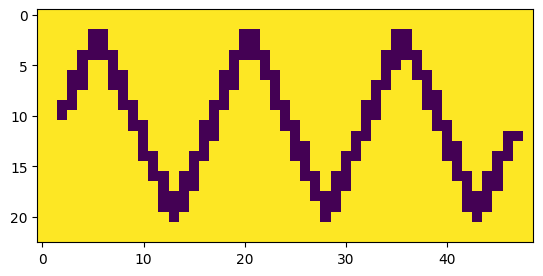

Cropped image saved as


In [378]:
import cv2


    # Load the input image
image = binarna_slika
    
    # Ensure the image was loaded successfully
if image is None:
    print("Error loading image")
    
    
    # Extract the coordinates

    
    # Crop the image using the specified coordinates
cropped_image = image[30:53, 60:109]
plt.imshow(cropped_image)
plt.show()
    # Save the cropped image
cv2.imwrite("C:/Users/mihai/Documents/pfe/cropped_image.jpg", cropped_image)

print("Cropped image saved as")

# Example usage



In [328]:
otpornik=binarna_slika

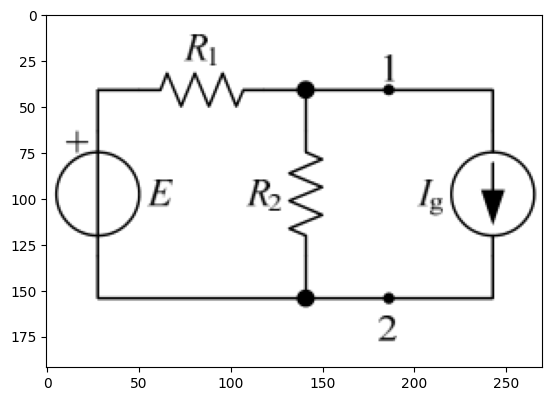

In [336]:
putanja_slike = "2.png"
slika = cv2.imread(putanja_slike, cv2.IMREAD_GRAYSCALE)
plt.imshow(slika,cmap='gray')
